<a href="https://colab.research.google.com/github/sauravtanwar786/CDAC/blob/main/Advanced%20Analystics%20using%20Statistics/Copy_of_Type_1_%26_Type_2_error_test_Chi_Square_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Type 1 and Type 2 errors test

In [ ]:
from sklearn.datasets import load_iris
import numpy as np
from scipy.stats import ttest_ind

# Load the iris dataset
iris = load_iris()
data = iris.data  # features
target = iris.target  # species labels

# Filter data for two species: setosa (label 0) and versicolor (label 1)
setosa_sepal_length = data[target == 0][:, 0]  # Sepal length for setosa
versicolor_sepal_length = data[target == 1][:, 0]  # Sepal length for versicolor

# Simulation parameters
alpha = 0.05
num_simulations = 1000
sample_size = 25

# 9p
type_1_error_count = 0
type_2_error_count = 0

# Type 1 Error Simulation: Compare setosa vs. setosa (identical distribution)
for _ in range(num_simulations):
    group1 = np.random.choice(setosa_sepal_length, sample_size, replace=True)
    group2 = np.random.choice(setosa_sepal_length, sample_size, replace=True)
    t_stat, p_value = ttest_ind(group1, group2)
    if p_value < alpha:
        type_1_error_count += 1

# Type 2 Error Simulation: Compare setosa vs. versicolor (different distributions)
for _ in range(num_simulations):
    group1 = np.random.choice(setosa_sepal_length, sample_size, replace=True)
    group2 = np.random.choice(versicolor_sepal_length, sample_size, replace=True)
    t_stat, p_value = ttest_ind(group1, group2)
    if p_value >= alpha:
        type_2_error_count += 1

# Calculate error rates
type_1_error_rate = type_1_error_count / num_simulations
type_2_error_rate = type_2_error_count / num_simulations

# Output results
print("Type 1 Error Rate (False Positive):", type_1_error_rate)
print("Type 2 Error Rate (False Negative):", type_2_error_rate)


Type 1 Error Rate (False Positive): 0.054
Type 2 Error Rate (False Negative): 0.0


**Explanation**
# Type 1 Error:

- We use the setosa species’ sepal length as both groups.
Since the groups are identical, the null hypothesis (no difference) is true.
- We track cases where p-value < alpha, representing false positives.

# Type 2 Error:

- We use setosa for one group and versicolor for the other.
Since the groups have different distributions, the null hypothesis is false.
- We count cases where p-value >= alpha, representing false negatives.
Interpretation

# Type 1 Error Rate: This is the rate at which we incorrectly reject the null hypothesis (false positives).

# Type 2 Error Rate: This is the rate at which we incorrectly fail to reject the null hypothesis (false negatives).

**This analysis provides insight into the error rates for a given sample size and test setup. You can experiment with different features or parameters to observe how they impact the error rates.**

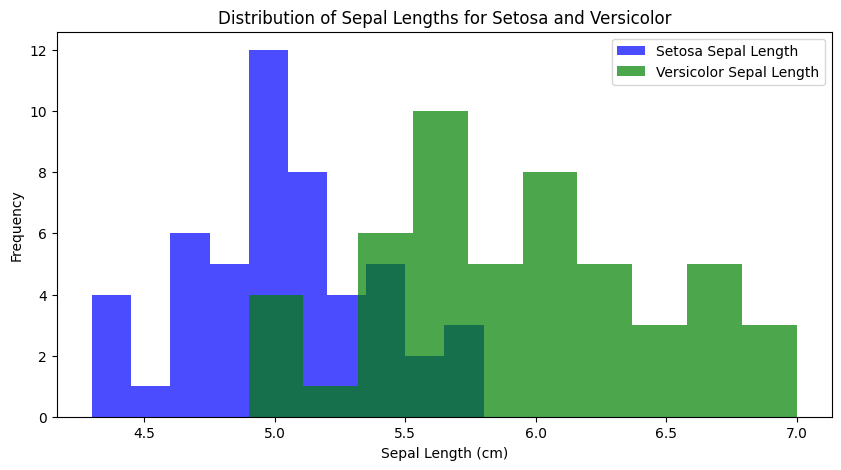

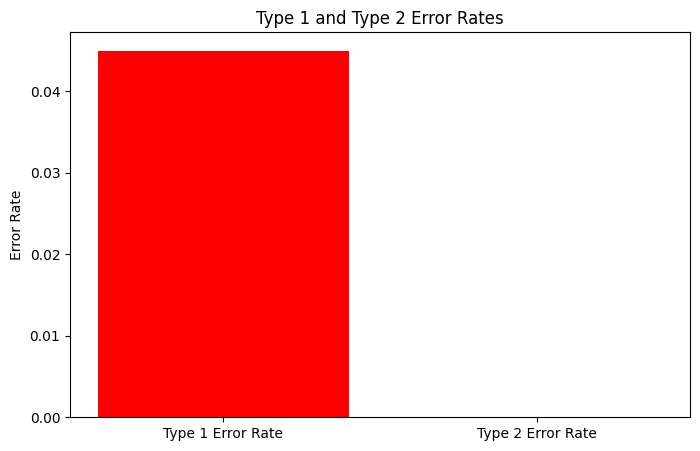

Type 1 Error Rate (False Positive): 0.045
Type 2 Error Rate (False Negative): 0.0


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
data = iris.data  # features
target = iris.target  # species labels

# Filter data for two species: setosa (label 0) and versicolor (label 1)
setosa_sepal_length = data[target == 0][:, 0]  # Sepal length for setosa
versicolor_sepal_length = data[target == 1][:, 0]  # Sepal length for versicolor

# Simulation parameters
alpha = 0.05
num_simulations = 1000
sample_size = 25

# Initialize counters for errors
type_1_error_count = 0
type_2_error_count = 0

# Type 1 Error Simulation: Compare setosa vs. setosa (identical distribution)
for _ in range(num_simulations):
    group1 = np.random.choice(setosa_sepal_length, sample_size, replace=True)
    group2 = np.random.choice(setosa_sepal_length, sample_size, replace=True)
    t_stat, p_value = ttest_ind(group1, group2)
    if p_value < alpha:
        type_1_error_count += 1

# Type 2 Error Simulation: Compare setosa vs. versicolor (different distributions)
for _ in range(num_simulations):
    group1 = np.random.choice(setosa_sepal_length, sample_size, replace=True)
    group2 = np.random.choice(versicolor_sepal_length, sample_size, replace=True)
    t_stat, p_value = ttest_ind(group1, group2)
    if p_value >= alpha:
        type_2_error_count += 1

# Calculate error rates
type_1_error_rate = type_1_error_count / num_simulations
type_2_error_rate = type_2_error_count / num_simulations

# Visualization 1: Histograms for Sepal Lengths of Setosa and Versicolor
plt.figure(figsize=(10, 5))
plt.hist(setosa_sepal_length, bins=10, alpha=0.7, label="Setosa Sepal Length", color='blue')
plt.hist(versicolor_sepal_length, bins=10, alpha=0.7, label="Versicolor Sepal Length", color='green')
plt.title("Distribution of Sepal Lengths for Setosa and Versicolor")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Visualization 2: Type 1 and Type 2 Error Rates as a Bar Chart
error_rates = [type_1_error_rate, type_2_error_rate]
error_labels = ['Type 1 Error Rate', 'Type 2 Error Rate']
plt.figure(figsize=(8, 5))
plt.bar(error_labels, error_rates, color=['red', 'orange'])
plt.title("Type 1 and Type 2 Error Rates")
plt.ylabel("Error Rate")
plt.show()

# Output results
print("Type 1 Error Rate (False Positive):", type_1_error_rate)
print("Type 2 Error Rate (False Negative):", type_2_error_rate)


- Explanation of Visualizations
  - Distribution of Sepal Lengths:
    - This histogram compares the sepal lengths of setosa and versicolor.
    - It provides a visual understanding of how the two groups differ, making it easier to understand why Type 2 errors might occur if we cannot detect a difference.
Type 1 and Type 2 Error Rates Bar Chart:

- This bar chart displays the computed Type 1 and Type 2 error rates from the simulations.
- It offers a quick view of how often each error type occurs under the current experimental setup.

**Let’s switch to the tips dataset in seaborn, which contains information about bills and tips in a restaurant setting. We can analyze whether there’s a difference in the total bill amounts based on the day of the week (e.g., comparing Saturday and Sunday) and simulate Type 1 and Type 2 errors with it.**

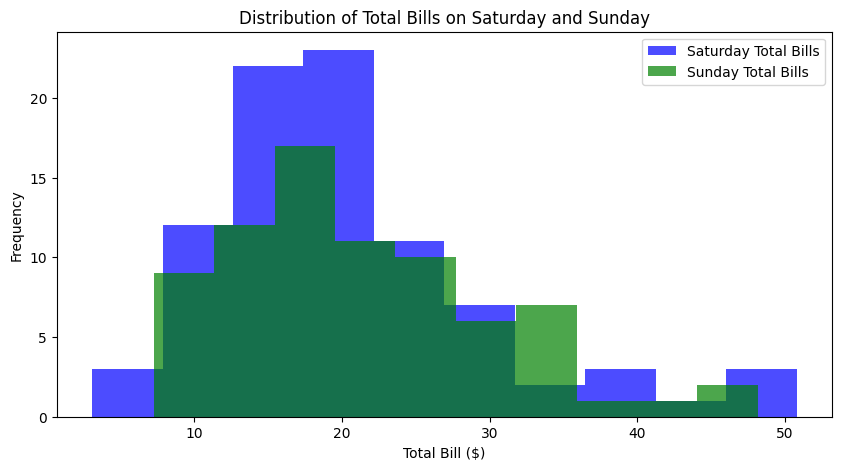

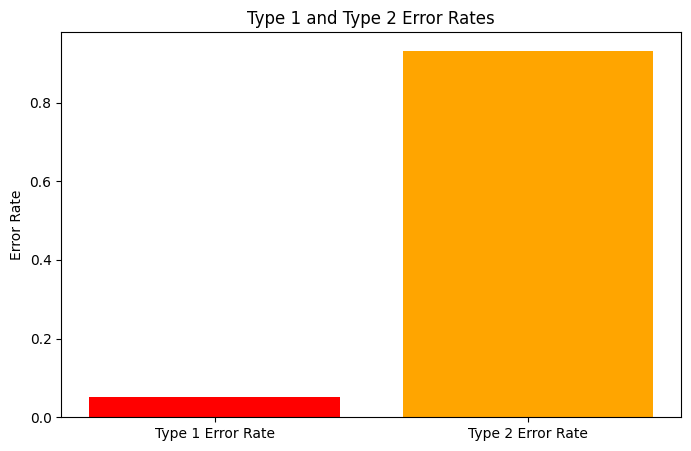

Type 1 Error Rate (False Positive): 0.052
Type 2 Error Rate (False Negative): 0.932


In [ ]:
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Load the tips dataset
tips_data = sns.load_dataset("tips")

# Filter data for two different days: Saturday and Sunday
saturday_bills = tips_data[tips_data['day'] == 'Sat']['total_bill']
sunday_bills = tips_data[tips_data['day'] == 'Sun']['total_bill']

# Simulation parameters
alpha = 0.05
num_simulations = 1000
sample_size = 25

# Initialize counters for errors
type_1_error_count = 0
type_2_error_count = 0

# Type 1 Error Simulation: Compare Saturday vs. Saturday (identical distribution)
for _ in range(num_simulations):
    group1 = np.random.choice(saturday_bills, sample_size, replace=True)
    group2 = np.random.choice(saturday_bills, sample_size, replace=True)
    t_stat, p_value = ttest_ind(group1, group2)
    if p_value < alpha:
        type_1_error_count += 1

# Type 2 Error Simulation: Compare Saturday vs. Sunday (different distributions)
for _ in range(num_simulations):
    group1 = np.random.choice(saturday_bills, sample_size, replace=True)
    group2 = np.random.choice(sunday_bills, sample_size, replace=True)
    t_stat, p_value = ttest_ind(group1, group2)
    if p_value >= alpha:
        type_2_error_count += 1

# Calculate error rates
type_1_error_rate = type_1_error_count / num_simulations
type_2_error_rate = type_2_error_count / num_simulations

# Visualization 1: Histograms for Total Bills on Saturday and Sunday
plt.figure(figsize=(10, 5))
plt.hist(saturday_bills, bins=10, alpha=0.7, label="Saturday Total Bills", color='blue')
plt.hist(sunday_bills, bins=10, alpha=0.7, label="Sunday Total Bills", color='green')
plt.title("Distribution of Total Bills on Saturday and Sunday")
plt.xlabel("Total Bill ($)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Visualization 2: Type 1 and Type 2 Error Rates as a Bar Chart
error_rates = [type_1_error_rate, type_2_error_rate]
error_labels = ['Type 1 Error Rate', 'Type 2 Error Rate']
plt.figure(figsize=(8, 5))
plt.bar(error_labels, error_rates, color=['red', 'orange'])
plt.title("Type 1 and Type 2 Error Rates")
plt.ylabel("Error Rate")
plt.show()

# Output results
print("Type 1 Error Rate (False Positive):", type_1_error_rate)
print("Type 2 Error Rate (False Negative):", type_2_error_rate)


Type 1 Error:

- We use total bill values from Saturday as both groups.
Since the samples are drawn from the same day, there’s no actual difference between them, meaning the null hypothesis (no difference) is true.
- We track cases where p-value < alpha, representing Type 1 errors (false positives).

Type 2 Error:

- We sample from the total bill values for Saturday and Sunday, which may have different means.
- Since the groups represent different days, we expect a difference in their distributions, making the null hypothesis false.
We count cases where p-value >= alpha, representing Type 2 errors (false negatives).

- Let’s say we have a survey dataset that includes two categorical variables:

  - Question 1: Gender (Male, Female)
  - Question 2: Preference for an activity (Yes, No)

- We aim to see if there’s an association between gender and activity preference.



In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Example dataset
data = {
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Preference': ['Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes']
}

# Convert to a DataFrame
df = pd.DataFrame(data)

# Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Preference'])

# Apply the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:\n", expected)

# Interpretation
if p < 0.05:
    print("There is a significant association between Gender and Preference.")
else:
    print("There is no significant association between Gender and Preference.")


Chi-Square Statistic: 0.0
p-value: 1.0
Degrees of Freedom: 1
Expected Frequencies Table:
 [[2. 2.]
 [2. 2.]]
There is no significant association between Gender and Preference.


**Explanation**
- Contingency Table: pd.crosstab creates a contingency table showing the frequency of each combination of Gender and Preference.
- Chi-Square Test: chi2_contingency calculates the Chi-Square statistic, p-value, degrees of freedom, and expected frequencies.
- Interpretation: If the p-value is less than 0.05, we conclude there is a significant association; otherwise, there isn’t.

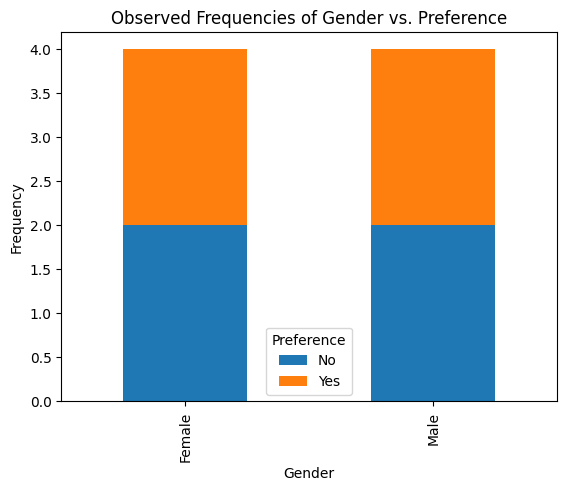

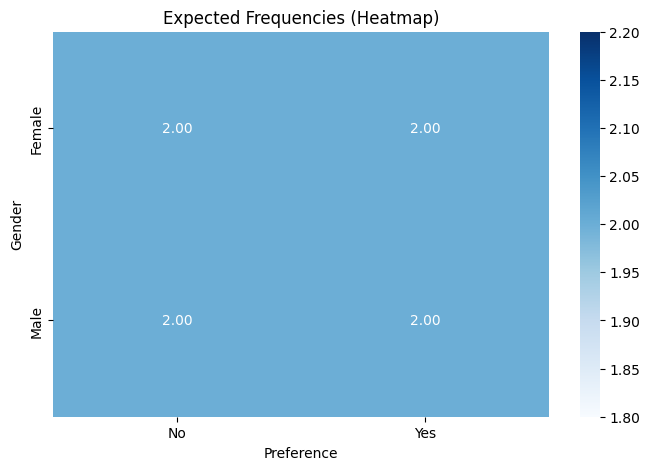

Chi-Square Statistic: 0.0
p-value: 1.0
Degrees of Freedom: 1
Expected Frequencies Table:
 Preference   No  Yes
Gender              
Female      2.0  2.0
Male        2.0  2.0
There is no significant association between Gender and Preference.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Example dataset
data = {
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Preference': ['Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes']
}

# Convert to a DataFrame
df = pd.DataFrame(data)

# Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Preference'])

# Apply the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Plotting Observed Frequencies as a Bar Chart
contingency_table.plot(kind='bar', stacked=True)
plt.title('Observed Frequencies of Gender vs. Preference')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.legend(title='Preference')
plt.show()

# Plotting Expected Frequencies as a Heatmap
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
plt.figure(figsize=(8, 5))
sns.heatmap(expected_df, annot=True, fmt=".2f", cmap="Blues")
plt.title('Expected Frequencies (Heatmap)')
plt.xlabel('Preference')
plt.ylabel('Gender')
plt.show()

# Interpretation
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:\n", expected_df)

if p < 0.05:
    print("There is a significant association between Gender and Preference.")
else:
    print("There is no significant association between Gender and Preference.")


**Explanation of Visualizations**
- Observed Frequencies (Bar Chart): This chart shows the actual counts in each category combination (e.g., Male & Yes, Female & No).
- Expected Frequencies (Heatmap): The heatmap provides a visual view of the expected frequencies under the null hypothesis of independence, helping to see any major deviations from what we would expect if there were no association.

 **Imagine a dataset with two categorical variables:**

- Age Group: Categorized as 'Under 18', '18-35', '36-50', '51 and above'
- Product Preference: Preference between 'Product A' and 'Product B'
We’ll conduct a Chi-Square test to see if there’s an association between Age Group and Product Preference.

Chi-Square Statistic: 1.3333333333333333
p-value: 0.7212333746277604
Degrees of Freedom: 3
Expected Frequencies Table:
 Product Preference  Product A  Product B
Age Group                               
18-35                     1.5        1.5
36-50                     1.5        1.5
51 and above              1.5        1.5
Under 18                  1.5        1.5


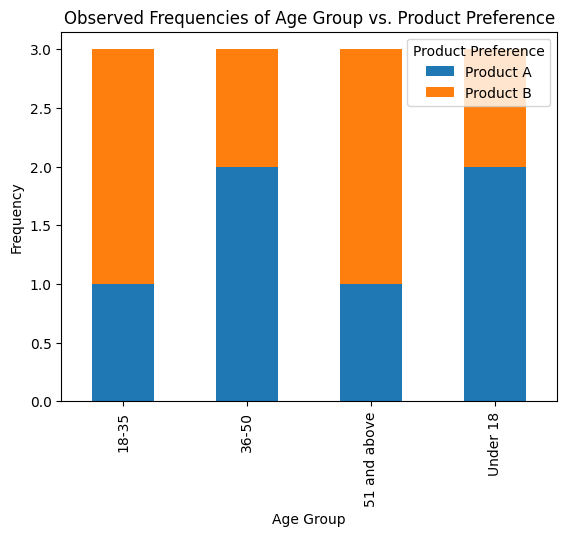

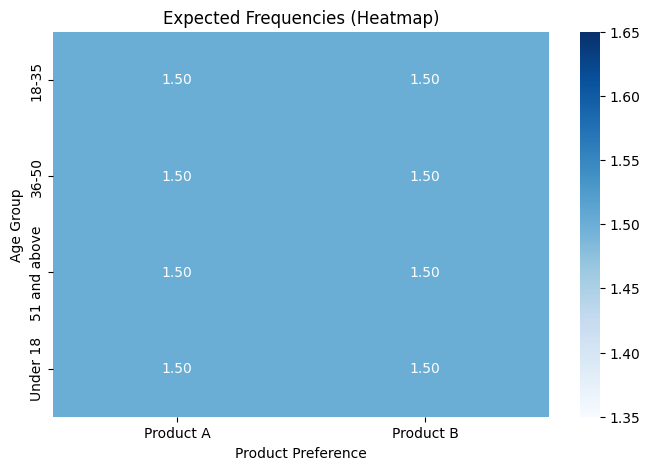

Fail to reject the null hypothesis (p-value = 0.7212333746277604 > α = 0.05). There is no significant association between Age Group and Product Preference.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Example dataset
data = {
    'Age Group': ['Under 18', '18-35', '36-50', '51 and above', 'Under 18', '18-35', '36-50', '51 and above',
                  'Under 18', '18-35', '36-50', '51 and above'],
    'Product Preference': ['Product A', 'Product A', 'Product B', 'Product B', 'Product A', 'Product B',
                           'Product A', 'Product A', 'Product B', 'Product B', 'Product A', 'Product B']
}

# Convert to a DataFrame
df = pd.DataFrame(data)

# Create a contingency table
contingency_table = pd.crosstab(df['Age Group'], df['Product Preference'])

# Apply the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:\n", pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

# Visualization 1: Observed Frequencies (Bar Chart)
contingency_table.plot(kind='bar', stacked=True)
plt.title('Observed Frequencies of Age Group vs. Product Preference')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.legend(title='Product Preference')
plt.show()

# Visualization 2: Expected Frequencies (Heatmap)
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
plt.figure(figsize=(8, 5))
sns.heatmap(expected_df, annot=True, fmt=".2f", cmap="Blues")
plt.title('Expected Frequencies (Heatmap)')
plt.xlabel('Product Preference')
plt.ylabel('Age Group')
plt.show()

# Hypothesis Testing Decision
alpha = 0.05
if p <= alpha:
    print(f"Reject the null hypothesis (p-value = {p} ≤ α = {alpha}). There is a significant association between Age Group and Product Preference.")
else:
    print(f"Fail to reject the null hypothesis (p-value = {p} > α = {alpha}). There is no significant association between Age Group and Product Preference.")
